<a href="https://colab.research.google.com/github/ashutoshmarachi/my-python-projects/blob/main/incresed_78_to_83.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
upload = files.upload()

Saving adult.csv to adult.csv


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   education        48842 non-null  object
 3   educational-num  48842 non-null  int64 
 4   marital-status   48842 non-null  object
 5   occupation       48842 non-null  object
 6   relationship     48842 non-null  object
 7   race             48842 non-null  object
 8   gender           48842 non-null  object
 9   capital-gain     48842 non-null  int64 
 10  capital-loss     48842 non-null  int64 
 11  hours-per-week   48842 non-null  int64 
 12  native-country   48842 non-null  object
 13  income           48842 non-null  object
dtypes: int64(5), object(9)
memory usage: 5.2+ MB
None
                age  educational-num  capital-gain  capital-loss  \
count  48842.000000     48842.000000  48842.0000

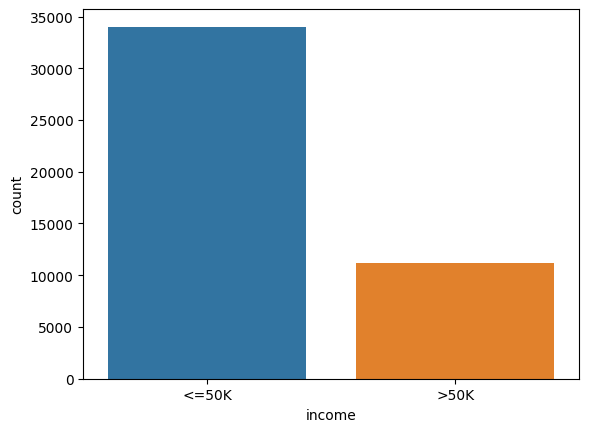

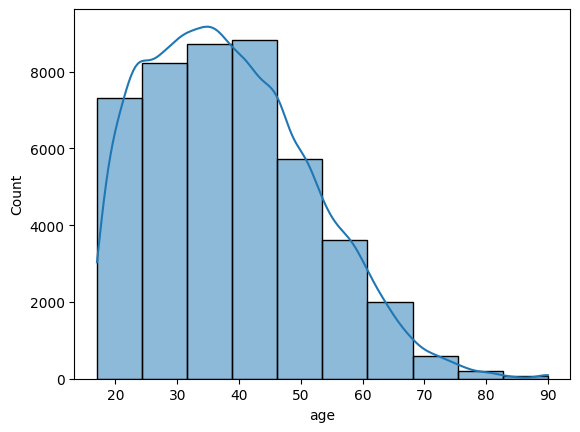

<ipython-input-3-b18cbf88716f>:113: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data2['income'] = data2['income'].map({'<=50K':0,'>50K':1})#we are mapping the column


0        0
1        0
2        1
3        1
5        0
        ..
48837    0
48838    1
48839    0
48840    0
48841    1
Name: income, Length: 45222, dtype: int64
       age  educational-num  capital-gain  capital-loss  hours-per-week  \
0       25                7             0             0              40   
1       38                9             0             0              50   
2       28               12             0             0              40   
3       44               10          7688             0              40   
5       34                6             0             0              30   
...    ...              ...           ...           ...             ...   
48837   27               12             0             0              38   
48838   40                9             0             0              40   
48839   58                9             0             0              40   
48840   22                9             0             0              20   
48841   52  

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


'we can increase the accuracy the model by removing all the in significant model'

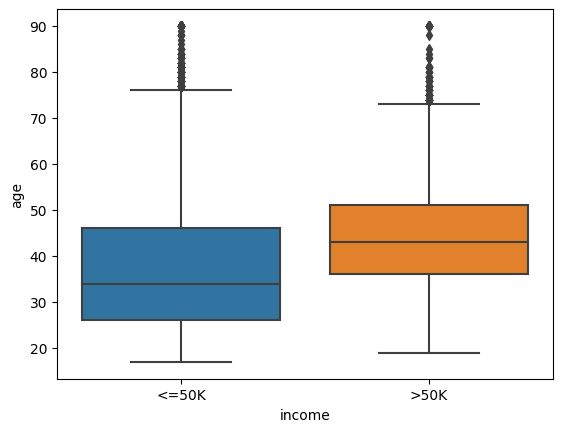

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.metrics import confusion_matrix












data_income =pd.read_csv('adult.csv')

#here we have imporetd the data in the data frame data_income

data = data_income.copy() #we have make the copy of the orignal data frame to avaoid the changes in the orignal data

''' exploring the data here we will explore the data a\n
data processing (missing values)
cross tables and data visualization'''
print(data.info())#to see the diffrent Dtype
data.isnull().sum()# to check the missing into the columns


summary_num=data.describe()#this will show only the info for numerical data
print(summary_num)
summary_cate=data.describe(include = 'O')#this will show the frequency of the objects
print(summary_cate)

''' it wil be more insightful if we see the diffrent categories of each column it willgive more grasp of the data'''
data['workclass'].value_counts()
data['occupation'].value_counts()
''' after running the upper comand we notice that there are special chacter in\n
the data so we will see how exactly the special characters are in the data'''
print(np.unique(data['workclass']))
print(np.unique(data['occupation']))

''' now we need to include '?' as a na value'''
data = pd.read_csv('adult.csv',na_values=["?"])


'''Data preprocessing'''
data.isnull().sum()

'''now we will see the rows where any column is missing'''
missing = data[data.isnull().any(axis=1)] #axis=1 to consider at least one column value is missing
print(missing.info())



''' now we will remove all the data where any missing value is present'''
data2= data.dropna(axis = 0)#by setting axis =0 we are droping all rows wehere data is na
data2.info()


#relationship beetwen two independent variables
correlation = data2.corr(numeric_only= True)
print(correlation)#since we have found that the values are not equal to 1 or near 1 so there is very less corraltion b/w the numericals

''' cross table and data visuals fnc.  what is a cross table do loook for this question'''
data2.columns

#Gender proportion table
gender = pd.crosstab(index = data2["gender"],
                     columns ='count',
                     normalize = True)
print(gender)# after this we came to know that there are 67 percent males and rest females
#now we will lokk at how income vaires with gender
gender_salstat = pd.crosstab(index = data2["gender"],
                             columns = data2['income'],
                             margins = True,
                    normalize= 'index'         )#by setting normalize= index we get the row proportion =1

print(gender_salstat )
''' lets look at this graphically'''
sns.countplot(data=data2, x='income')
plt.show()
#by graph it is clear that 75 percent of the people earns less than 50000 dollars
'''now let us plot a histogram to check the underlying frequecy distribution of age varibale'''


sns.histplot(data2['age'],bins=10,kde= True)
plt.show()
#this clear from the plot the age of peeople is genreally 20 to 45
''' box plot -age vs slary stattus'''
sns.boxplot(x='income', y='age', data=data2)


data2.groupby('income')['age'].median()#i stil donot understand what it is doing







''' these are the basic plots that we have seen now we will be using a machine learnig algorithm\n
which will classify the data into thediffrent'''



''' logistic regression'''
# reindexing the salary status names to 0,1 i am tryting to map
data2['income'] = data2['income'].map({'<=50K':0,'>50K':1})#we are mapping the column


print(data2['income'])

''' now we will covert categorical  variable into intergers with the help of get dummies function'''
new_data =pd.get_dummies(data2,drop_first = True)

'''By setting drop_first=True, the function will automatically drop the first category, making it the reference category. This reference category represents the baseline or default state. The remaining dummy variables represent the other categories and indicate whether they are present or not.

Dropping the first category simplifies the interpretation of the model, reduces the risk of multicollinearity, and avoids introducing unnecessary complexity into the model. It also helps ensure that the linear relationship between the predictor variables and the response variable is well-defined.'''

print(new_data)

#storing the columns names
columns_list = list(new_data.columns)
print(columns_list)

#separating the input names from the data(i dont know why this is done)
features = list(set(columns_list)-set(['income']))
print("this is list",features)



#storing the output values in y (i dont now why this is done)
y=new_data['income'].values
print(y)


#storing the values from input features
x= new_data[features].values
print(x)


#spliting the data into train and test
train_x,test_x,train_y,test_y = train_test_split(x,y,test_size=0.3,random_state=0)

#make an instance Model
logistic =LogisticRegression()

# Fitting the values for x and y
logistic.fit(train_x,train_y)
logistic.coef_
logistic.intercept_


#prediction from the test data
prediction = logistic.predict(test_x)

print(prediction)


"""now we have to evaluate the model using the confusion matrix"""
#confusion matrix
confusion_matrix = confusion_matrix(test_y, prediction)
print("this is confusion matrix",confusion_matrix)


#now we have to check the accuracy of the model
accuracy_score = accuracy_score(test_y, prediction)
print("this is the accuracy score of our model",accuracy_score)


#printing the misclassified values from prediction
print("Misclassified samples: %d" % (test_y != prediction).sum())



'''we can increase the accuracy the model by removing all the in significant model'''